# Outlier Detection

### Table of Contents

* Task
* Data Exploration
* Uni-Variate Outlier Detection
* Multi-Variate Outlier Detection

# Business Problem Statement

Develop an algorithm to identify outliers in the financial data, focusing on specific columns such as costs, expenses, or any relevant financial indicators. Outliers in this context refer to unusual or extreme values that may indicate irregularities in spending patterns or potential issues.

### Objectives
- Develop an algorithm for identifying outliers in financial data.
- Consider scenarios where certain members exhibit exceptionally high costs in the current month.
- Create a solution that effectively detects and flags such outlier records.

<p align="center">
  <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*tSbi0Ud8LGmmB6LXRJHu1w.jpeg" alt="Image">
</p>


# Data Description

The dataset, `sfr_test.csv`, comprises fictional financial information about customers of the company. Below is a description of the selected columns from this dataset:

- **`member_unique_id`**
  - Member's ID

- **`gender`**
  - Member's gender

- **`dob`**
  - Member's date of birth

- **`eligible_year`**
  - Year

- **`eligible_month`**
  - Month

- **`affiliation_type`**
  - Doctor's type

- **`pbp_group`**
  - Health plan group

- **`plan_name`**
  - Health plan name

- **`npi`**
  - Doctor's ID

- **`line_of_business`**
  - Health plan type

- **`esrd`**
  - True if the patient is on dialysis

- **`hospice`**
  - True if the patient is in hospice

The remaining columns in the dataset contain various financial indicators, and all values in these financial columns are denoted by a `$` sign.


# Assignment
#### Identifying Outliers in Financial Data

In this exercise, we will be working with an example dataset containing financial data (all numbers are fictional). The goal is to develop an algorithm capable of detecting outliers within the dataset, either in a single column or across multiple columns. 

### Approach
To achieve the objectives outlined above, consider the following steps:

1. **Data Exploration:**
   - Thoroughly examine the dataset to understand its structure and contents.
   - Identify potential outlier patterns and distributions.

2. **Feature Selection:**
   - Choose relevant features that may contribute to the identification of outliers.
   - Consider factors such as current month costs, historical data, and any other pertinent information.


### Outlier Detection Approaches

In addressing the outlier detection problem, we will explore two approaches:

1. **Univariate Approach:**
   We will examine each variable individually to identify outliers.

2. **Multivariate Approach:**
   We will assess relationships between variables to detect outliers using a multivariate analysis.

By considering both univariate and multivariate methods, we aim to comprehensively address the outlier detection challenge.



### Conclusion
By successfully implementing this algorithm, we aim to enhance our ability to identify and address potential financial outliers within the dataset, contributing to more informed decision-making for business stakeholders.


# Data Exploration

In [16]:
# Import the pandas library and read the CSV file into a DataFrame
import pandas as pd

# Load the data from the "sfr_test.csv" file into a DataFrame
my_data_frame = pd.read_csv("./datasets/sfr_test.csv")
my_data_frame.head()

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
0,1,F,21/06/1990,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,$0.00,"$3,507.00",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$843.78
1,2,M,02/01/1948,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,$0.00,"$6,204.84",$0.00,$8.13,$0.00,"$11,289.69",$0.00,"$10,688.46","$10,859.82",$906.77
2,3,M,14/06/1948,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,$0.00,"$4,012.46",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$815.84
3,4,M,10/02/1954,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,...,$0.00,"$9,770.61",$0.00,$8.30,$0.00,$73.88,$0.00,$62.87,$64.91,$846.26
4,5,M,31/12/1953,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,$0.00,"$19,976.13","$8,875.80",$8.90,$0.00,$522.48,$0.00,$517.56,$606.01,$867.55


The following columns, which contain the dollar $ sign, have been identified for analysis:

- `ipa_funding`
- `ma_premium`
- `ma_risk_score`
- `mbr_with_rx_rebates`
- `partd_premium`
- `pcp_cap`
- `pcp_ffs`
- `plan_premium`
- `prof`
- `reinsurance`
- `risk_score_partd`
- `rx`
- `rx_rebates`
- `rx_with_rebates`
- `rx_without_rebates`
- `spec_cap`

These columns, totaling 16 out of the 28 available, will be assigned to a variable for easier manipulation.


In [17]:
# List of financial columns
my_financial_columns = [
    "ipa_funding",
    "ma_premium",
    "ma_risk_score",
    "mbr_with_rx_rebates",
    "partd_premium",
    "pcp_cap",
    "pcp_ffs",
    "plan_premium",
    "prof",
    "reinsurance",
    "risk_score_partd",
    "rx",
    "rx_rebates",
    "rx_with_rebates",
    "rx_without_rebates",
    "spec_cap"
]
# Replace characters like dollar signs and commas with an empty string and convert to float
my_data_frame[my_financial_columns] = my_data_frame[my_financial_columns].replace('[\$,]', '', regex=True).astype(float)
my_data_frame.head()

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
0,1,F,21/06/1990,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,0.0,3507.00,0.0,7.92,0.0,0.00,0.0,0.00,0.00,843.78
1,2,M,02/01/1948,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,0.0,6204.84,0.0,8.13,0.0,11289.69,0.0,10688.46,10859.82,906.77
2,3,M,14/06/1948,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,0.0,4012.46,0.0,7.92,0.0,0.00,0.0,0.00,0.00,815.84
3,4,M,10/02/1954,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,...,0.0,9770.61,0.0,8.30,0.0,73.88,0.0,62.87,64.91,846.26
4,5,M,31/12/1953,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,0.0,19976.13,8875.8,8.90,0.0,522.48,0.0,517.56,606.01,867.55


# Uni-Variate Outlier Detection

This Python code calculates descriptive statistics for the financial columns in the DataFrame (`my_data_frame`) specified by the list `my_financial_columns`. The result is stored in the variable `financial_columns_stats` and then transposed for better readability.

In [18]:
# Generate descriptive statistics for the financial columns and transpose the result
financial_columns_stats = my_data_frame[my_financial_columns].describe()
financial_columns_stats

,ipa_funding,ma_premium,ma_risk_score,mbr_with_rx_rebates,partd_premium,pcp_cap,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
count,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.0,10530.000000,10530.0,10530.000000,10530.000000,10530.000000
mean,10657.849594,12311.727551,14.601082,500.425354,281.523642,507.875923,44.715122,12622.875903,407.262296,8.728322,0.0,2166.888445,0.0,2177.164111,2177.391484,811.940253
std,7690.191694,8955.579076,11.398322,1130.533796,239.155174,269.436836,279.992983,9165.144567,1787.161653,0.505910,0.0,13570.047143,0.0,13867.469329,13775.436097,134.976209
min,1302.360000,1394.850000,0.000000,13.940000,8.620000,0.000000,0.000000,1295.180000,0.000000,7.910000,0.0,0.000000,0.0,0.000000,0.000000,578.320000
25%,5390.645000,6200.255000,6.502500,197.210000,130.780000,503.020000,0.000000,6362.810000,0.000000,8.290000,0.0,0.000000,0.0,0.000000,0.000000,711.512500
50%,8723.135000,10060.455000,11.740000,312.365000,220.590000,613.500000,0.000000,10317.105000,0.000000,8.690000,0.0,114.205000,0.0,115.150000,115.110000,775.110000
75%,13444.632500,15479.840000,18.920000,499.352500,352.032500,684.260000,0.000000,15886.765000,0.000000,9.160000,0.0,536.537500,0.0,536.535000,536.355000,890.310000
max,113850.930000,155112.650000,174.600000,32687.500000,3120.530000,833.330000,6056.440000,138352.500000,69516.960000,9.670000,0.0,557883.960000,0.0,570037.030000,588346.570000,1329.520000


Several observations in the data suggest potential outliers:

- The difference between the 75th percentile and the maximum value of `mbr_with_rx_rebates` is significantly larger compared to other quantiles.

- The 75th percentile of `pcp_ffs` remains zero, while its maximum value is 6056.44.

- Similarly, the 75th percentile of `prof` is still zero, while its maximum value is 69516.96.

- All values of `risk_score_partd` and `rx_rebates` are zeros and can be considered for removal from the data.

- `rx_with_rebates` and `rx_without_rebates` exhibit almost identical values.

These observations will guide our exploration and treatment of potential outliers in the dataset.


This Python code removes two specific financial columns, "risk_score_partd" and "rx_rebates," from the list named `my_financial_columns`.

In [19]:
# Remove specific financial columns from the list
my_financial_columns.remove("risk_score_partd")
my_financial_columns.remove("rx_rebates")


This Python code utilizes the Seaborn library and Matplotlib to create boxplots for each financial column in `my_financial_columns` within the DataFrame `my_data_frame`. The loop iterates through the financial columns, generating separate boxplots for each column, with the title of each plot corresponding to the respective financial column.

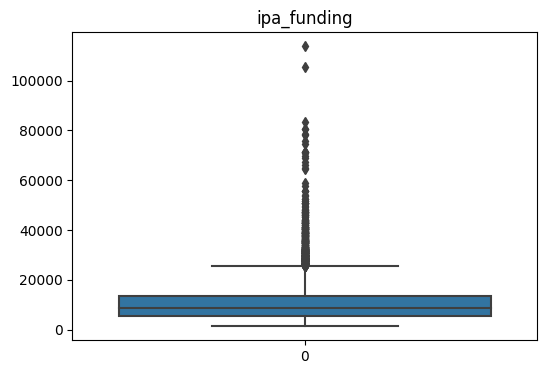

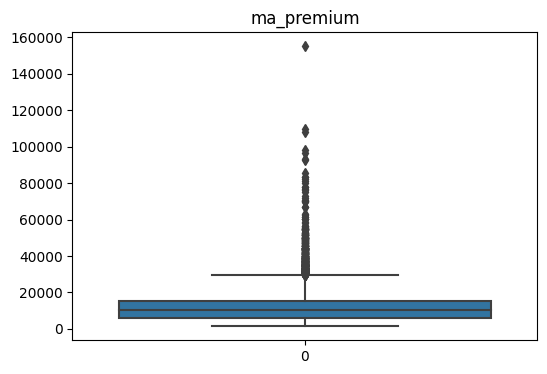

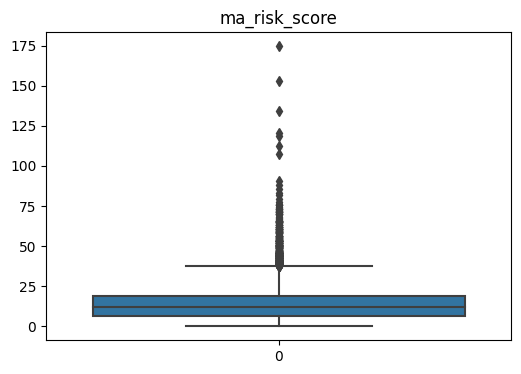

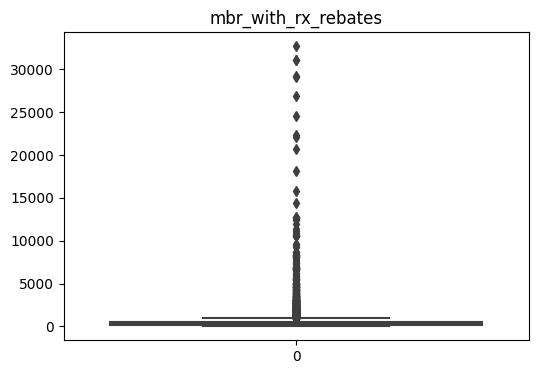

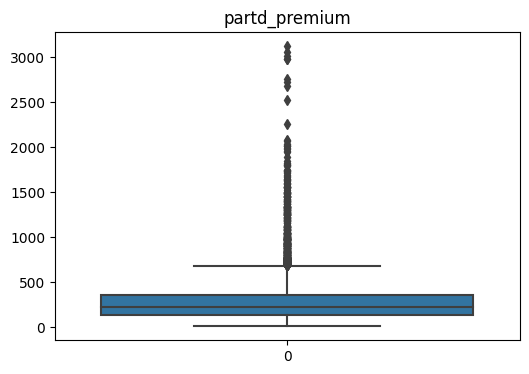

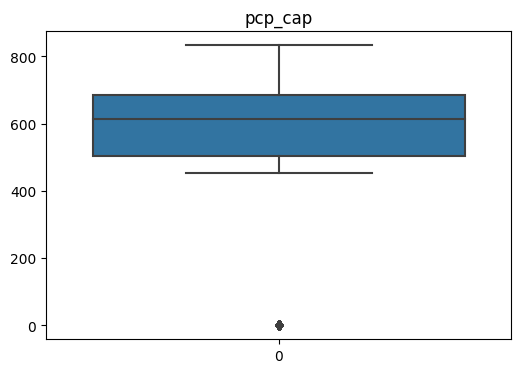

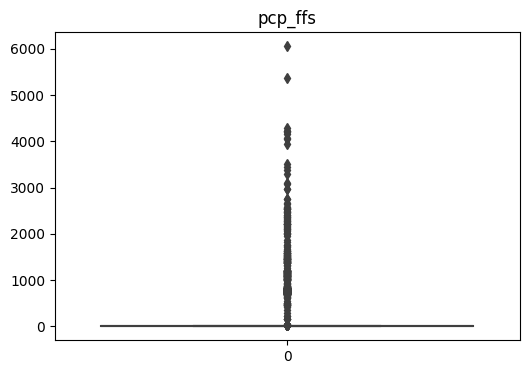

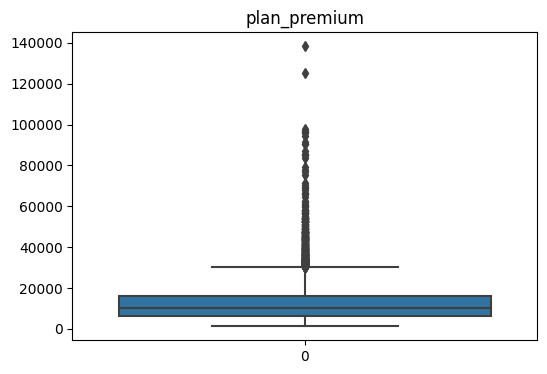

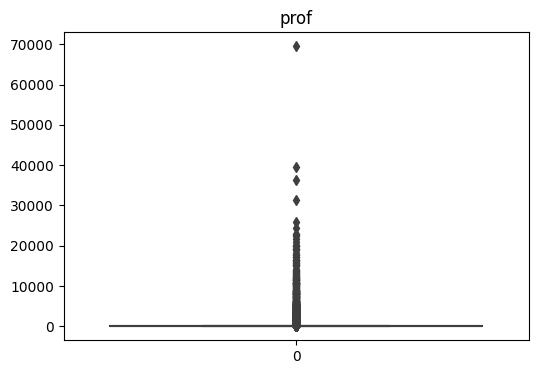

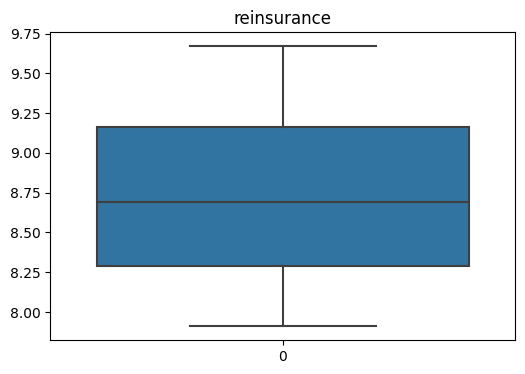

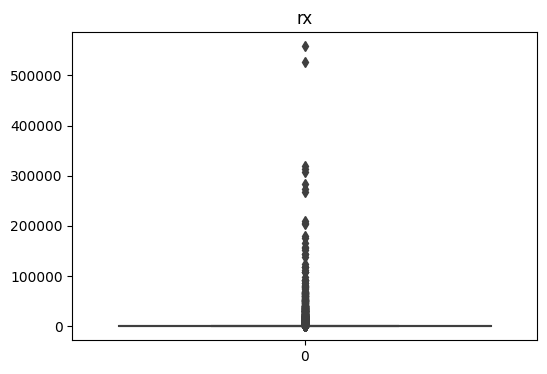

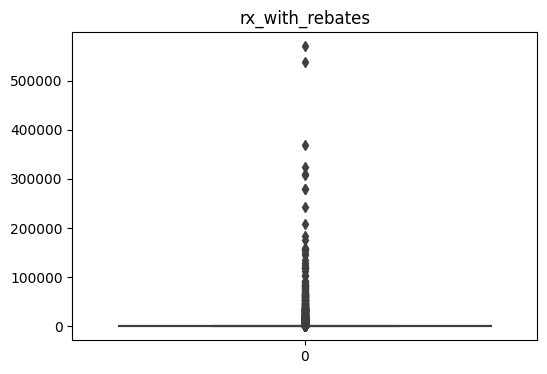

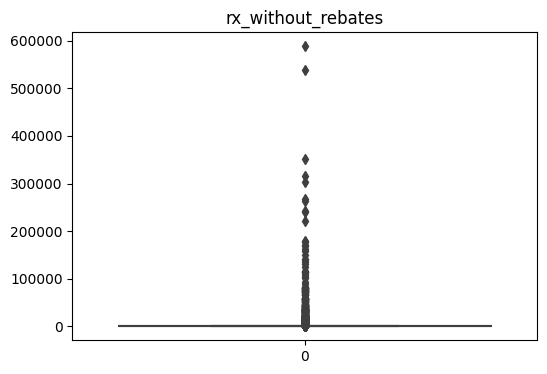

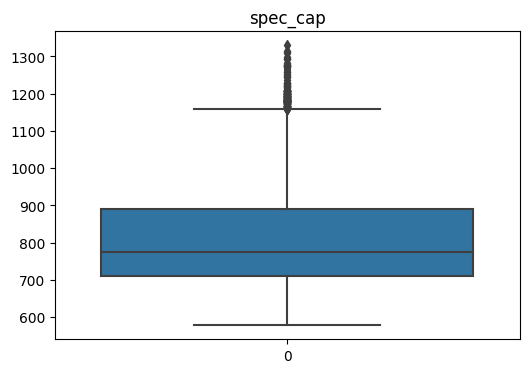

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
# Loop through financial columns and create boxplots
for i, my_financial_column in enumerate(my_financial_columns):
    plt.figure(figsize=(6, 4))
    plt.title(my_financial_column)
    sns.boxplot(data=my_data_frame[my_financial_column])


This Python code generates histograms for the financial columns in the DataFrame `my_data_frame`, specifically those listed in `my_financial_columns`. The histograms are displayed collectively in a grid layout with a specified figure size of (18, 12). The underscores before the variable assignment are commonly used when the return value is not intended to be used or displayed.

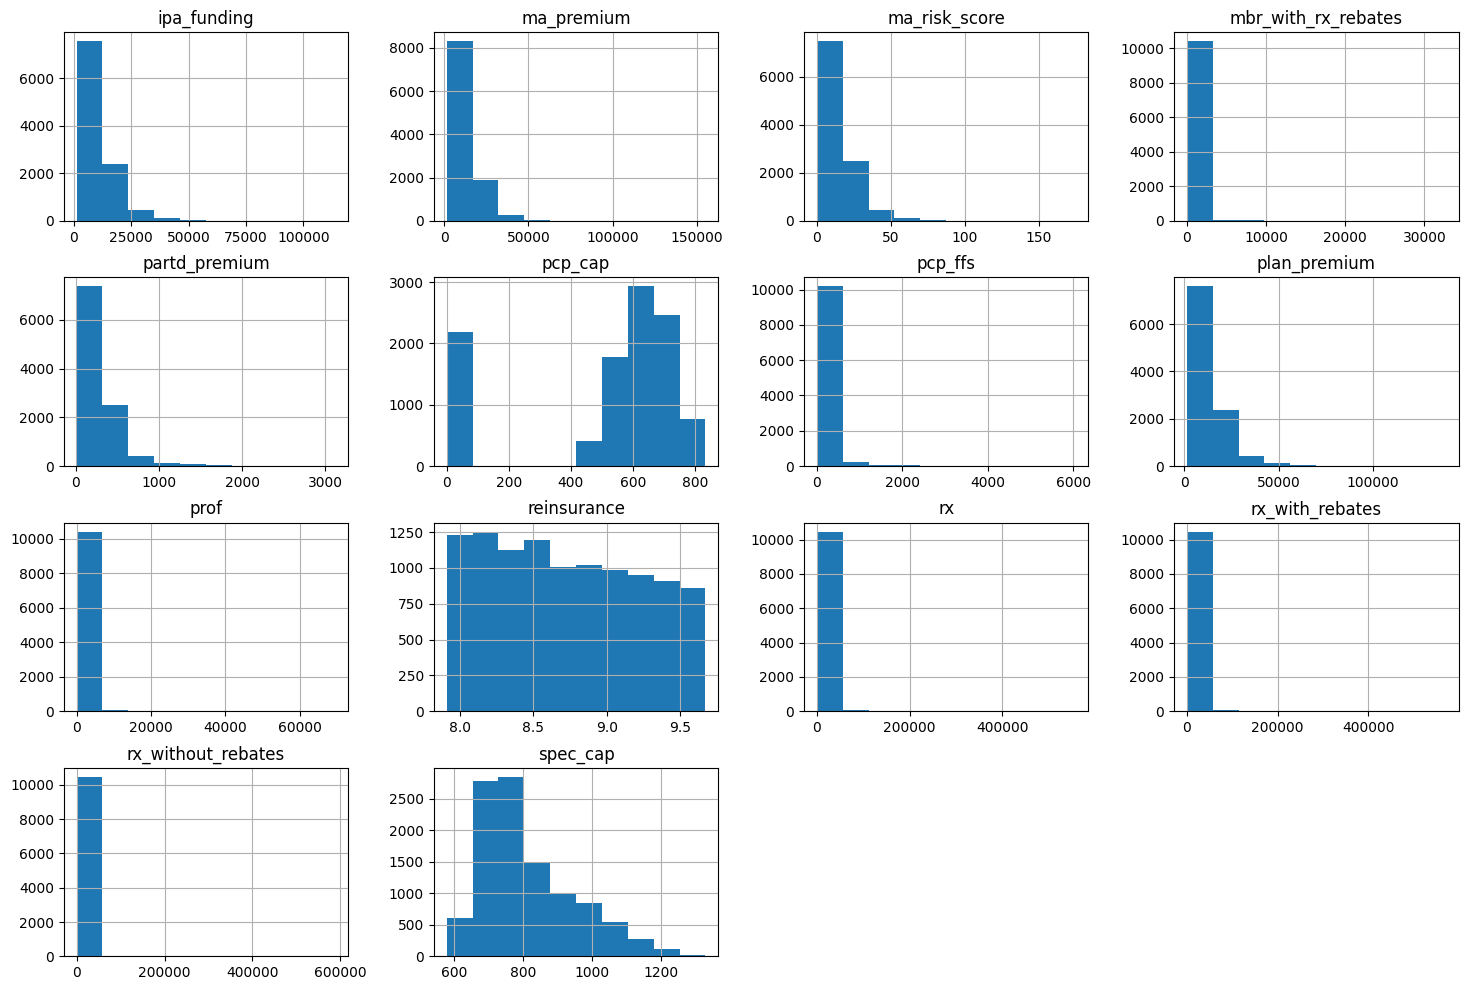

In [21]:
# Create histograms for financial columns
_ = my_data_frame[my_financial_columns].hist(figsize=(18, 12))


As anticipated, columns with a high prevalence of outliers, such as `rx`, `rx_with_rebates`, `prof`, etc., exhibit skewed distributions. However, these visualizations provide insights into the range of values for each column and potential outlier values.

To further address univariate outlier detection, we will employ the following approach:

1. **Standardization (Z-Score):**
   - We will calculate the Z-Score for each column by standardizing the values.
   - Z-Score is obtained by measuring how many standard deviations a data point is from the mean.

2. **Thresholding:**
   - Values exceeding 3 standard deviations from the mean will be considered outliers.
   - This threshold aims to identify values significantly deviating from the norm.

This method allows us to systematically identify and potentially address univariate outliers in the dataset.


In [22]:
from scipy import stats
import numpy as np

# Calculate the z-scores for the financial columns
z_scores = np.abs(stats.zscore(my_data_frame[my_financial_columns]))

# Print the indices where z-scores are greater than 3
print(np.where(z_scores > 3))


(array([    4,    62,    62, ..., 10513, 10513, 10513]), array([8, 0, 1, ..., 1, 2, 7]))


In addition to univariate outlier detection using Z-Score, we will print rows that contain more than one outlier. Given that we have 14 columns, we will focus on instances where rows exhibit more than 7 (half) values as outliers.

This approach will help us pinpoint specific rows that may have multiple variables deviating significantly from the expected range, providing a more comprehensive understanding of potential outliers in the dataset.


In [23]:
# Identify and extract rows with outliers in the financial columns
my_data_frame_outliers = my_data_frame[my_financial_columns][(z_scores > 3).any(axis=1)]

# Display the original DataFrame rows corresponding to the outliers
my_data_frame.iloc[my_data_frame_outliers.index]


,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
4,5,M,31/12/1953,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,0.0,19976.13,8875.80,8.90,0.0,522.48,0.0,517.56,606.01,867.55
62,63,M,29/06/1944,2020,202006,Affiliate,D-SNP,NaN,1,HMO,...,0.0,52110.53,0.00,9.48,0.0,27513.95,0.0,30963.89,32025.88,957.09
107,108,M,18/05/1956,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,...,0.0,36986.52,0.00,8.82,0.0,34279.67,0.0,35680.20,35819.58,818.94
122,123,M,30/06/1960,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,0.0,26505.44,15684.94,9.19,0.0,370.58,0.0,443.31,381.42,941.42
130,131,F,07/03/1968,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,2,HMO,...,0.0,15987.45,0.00,9.62,0.0,180462.51,0.0,155800.97,170609.15,794.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10464,10465,F,15/11/1952,2020,202006,SaludVIP,D-SNP,MEDICARE - CARENEEDS,93,HMO,...,0.0,47530.73,0.00,8.58,0.0,16817.65,0.0,16056.29,15375.67,965.78
10467,10468,M,27/11/1962,2020,202006,SaludVIP,D-SNP,MEDICARE - CARENEEDS,93,HMO,...,0.0,68885.56,1464.21,9.34,0.0,0.00,0.0,0.00,0.00,849.53
10480,10481,M,28/06/1941,2020,202006,SaludVIP,D-SNP,NaN,93,HMO,...,0.0,42951.59,383.18,8.61,0.0,519.83,0.0,558.89,547.31,988.67
10504,10505,M,18/04/1945,2020,202006,SaludVIP,D-SNP,NaN,93,HMO,...,0.0,27758.45,1074.61,9.50,0.0,151.94,0.0,140.86,137.64,944.89


This Python code identifies outliers in a DataFrame based on z-scores. It calculates the row indices of outliers, counts their occurrences, and filters out rows with outlier counts exceeding a specified threshold (7 in this case). Finally, it displays the original rows corresponding to the identified outliers in the DataFrame `my_data_frame`.

In [24]:
# Find row indices of outliers based on z-scores
outliers_row_indices = np.where(z_scores > 3)[0]

# Count the occurrences of each row index
unique_values, counts = np.unique(outliers_row_indices, return_counts=True)
outlier_counts = np.array((unique_values, counts)).T

# Set a threshold for the number of columns considered outliers
threshold = 7

# Filter outliers based on the threshold
outliers = [x for x in outlier_counts if x[1] > threshold]
indices = [i[0] for i in outliers]

# Display the original DataFrame rows corresponding to the outliers
my_data_frame.iloc[indices]


,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
780,781,F,22/04/1965,2020,202006,Affiliate,NON-SNP,NaN,6,HMO,...,0.00,53792.64,4355.27,8.12,0.0,210082.16,0.0,207571.22,221233.01,718.21
1558,1559,M,09/04/1954,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,12,HMO,...,2569.72,52416.81,14883.56,9.24,0.0,53395.04,0.0,50224.55,50035.92,904.75
2930,2931,F,06/07/1946,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,23,HMO,...,0.00,45385.61,19028.78,8.62,0.0,144987.53,0.0,149322.70,134973.37,746.08
6497,6498,M,10/05/1961,2020,202006,VIPcare,NON-SNP,NaN,57,HMO,...,0.00,54523.31,0.00,9.26,0.0,557883.96,0.0,570037.03,588346.57,803.13
8494,8495,M,23/03/1960,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,72,HMO,...,0.00,46395.36,8033.50,8.22,0.0,54213.57,0.0,59583.51,51639.04,1137.09


# Multi-Variate Outlier Detection

In this section, we will leverage machine learning techniques to detect outliers. Specifically, we will train models that take all financial columns as input and produce a classification or categorization indicating whether the input is an outlier.



In [25]:
from sklearn.ensemble import IsolationForest

# Initialize and fit the Isolation Forest model
my_isolation_forest = IsolationForest()
my_isolation_forest = my_isolation_forest.fit(my_data_frame[my_financial_columns])

# Predict outliers using Isolation Forest
inference_if = my_isolation_forest.predict(my_data_frame[my_financial_columns])

# Get the indices of rows marked as outliers
indices_if = np.where(inference_if == -1)[0]

# Print the number of data point marked as outliers
print("There are", len(indices_if), "data points marked as outliers")

# Display the original DataFrame rows corresponding to the outliers
my_data_frame.iloc[indices_if]


There are 918 data points marked as outliers


,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
1,2,M,02/01/1948,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,0.0,6204.84,0.00,8.13,0.0,11289.69,0.0,10688.46,10859.82,906.77
26,27,M,10/05/1955,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,0.0,5229.48,0.00,8.79,0.0,12753.16,0.0,13866.12,13189.06,957.09
54,55,F,29/01/1952,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,0.0,8227.35,0.00,9.26,0.0,13578.86,0.0,14515.80,15042.28,943.48
62,63,M,29/06/1944,2020,202006,Affiliate,D-SNP,NaN,1,HMO,...,0.0,52110.53,0.00,9.48,0.0,27513.95,0.0,30963.89,32025.88,957.09
107,108,M,18/05/1956,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,...,0.0,36986.52,0.00,8.82,0.0,34279.67,0.0,35680.20,35819.58,818.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10473,10474,F,25/01/1931,2020,202006,SaludVIP,NON-SNP,NaN,93,HMO,...,0.0,24552.03,0.00,8.56,0.0,13142.53,0.0,14746.97,15316.04,872.14
10477,10478,M,16/05/1954,2020,202006,SaludVIP,D-SNP,MEDICARE - CARENEEDS,93,HMO,...,0.0,23861.66,957.03,8.19,0.0,11022.89,0.0,13295.90,12065.29,960.72
10480,10481,M,28/06/1941,2020,202006,SaludVIP,D-SNP,NaN,93,HMO,...,0.0,42951.59,383.18,8.61,0.0,519.83,0.0,558.89,547.31,988.67
10504,10505,M,18/04/1945,2020,202006,SaludVIP,D-SNP,NaN,93,HMO,...,0.0,27758.45,1074.61,9.50,0.0,151.94,0.0,140.86,137.64,944.89


This Python code applies the Local Outlier Factor (LOF) algorithm from scikit-learn to detect outliers in the financial columns (`my_financial_columns`) of the DataFrame `my_data_frame`. It prints the number of data points marked as outliers and displays the original rows corresponding to these outliers in the DataFrame. The LOF algorithm assigns a score to each data point, and points with a score below a certain threshold are considered outliers.

In [26]:
from sklearn.neighbors import LocalOutlierFactor

# Initialize and fit the Local Outlier Factor model
my_local_outlier_factor = LocalOutlierFactor()
inference_lof = my_local_outlier_factor.fit_predict(my_data_frame[my_financial_columns])

# Get the indices of rows marked as outliers
indices_lof = np.where(inference_lof == -1)[0]

# Print the number of data point marked as outliers
print("There are", len(indices_lof), "datapoints marked as outliers")

# Display the original DataFrame rows corresponding to the outliers
my_data_frame.iloc[indices_lof]


There are 258 datapoints marked as outliers


,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
21,22,M,28/07/1953,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,0.0,4889.90,0.00,9.25,0.0,0.00,0.0,0.00,0.00,838.04
69,70,M,19/10/1959,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,0.0,6355.39,808.15,7.94,0.0,0.00,0.0,0.00,0.00,863.20
71,72,F,30/04/1951,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,0.0,5049.74,0.00,8.00,0.0,0.00,0.0,0.00,0.00,788.97
153,154,F,28/08/1939,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,2,HMO,...,0.0,5524.63,1215.20,8.06,0.0,536.10,0.0,631.26,587.23,797.12
280,281,M,16/10/1950,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,5,HMO,...,0.0,7613.64,0.00,8.55,0.0,0.00,0.0,0.00,0.00,849.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10393,10394,F,11/09/1970,2020,202006,VIPcare,NON-SNP,NaN,91,HMO,...,0.0,27777.57,0.00,8.25,0.0,282935.14,0.0,307263.96,267754.53,983.67
10416,10417,F,01/10/1952,2020,202006,Affiliate,NON-SNP,NaN,92,HMO,...,0.0,26991.41,20216.10,8.26,0.0,39042.92,0.0,40740.43,34167.00,674.73
10446,10447,M,05/09/1939,2020,202006,SaludVIP,NON-SNP,NaN,93,HMO,...,0.0,31192.02,8272.33,7.97,0.0,20628.43,0.0,17266.76,18408.79,891.63
10461,10462,M,04/08/1980,2020,202006,SaludVIP,D-SNP,MEDICARE - CARENEEDS,93,HMO,...,0.0,11707.19,0.00,9.03,0.0,0.00,0.0,0.00,0.00,885.61



Considering the observed discrepancy between the predictions of the Isolation Forest and Local Outlier Factor algorithms, we seek to enhance the confidence in our outlier predictions. To achieve this, we will adopt a consensus approach:

1. **Overlap Criteria:**
   - Individuals will be marked as outliers only if they are predicted as outliers by both the Isolation Forest and Local Outlier Factor algorithms.

By applying this consensus criterion, we aim to refine our identification of outliers, focusing on instances where both algorithms concur on the classification. This approach helps mitigate the potential impact of variations in algorithmic predictions and improves the robustness of our outlier detection process.


In [27]:
# Find the common indices of outliers detected by Isolation Forest and Local Outlier Factor
common_indices = list(set(indices_if).intersection(set(indices_lof)))

# Display the original DataFrame rows corresponding to the common outliers
my_data_frame.iloc[common_indices]


,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
2561,2562,M,15/08/1947,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,20,HMO,...,0.00,21796.83,39523.72,8.76,0.0,2095.67,0.0,1913.95,2188.25,962.69
7170,7171,M,12/06/1932,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,61,HMO,...,0.00,26351.77,12994.91,8.09,0.0,0.00,0.0,0.00,0.00,1038.88
6662,6663,F,15/09/1951,2020,202006,Affiliate,NON-SNP,NaN,58,HMO,...,4161.69,7034.44,4351.99,8.48,0.0,597.39,0.0,551.25,551.25,771.61
3602,3603,F,07/11/1944,2020,202006,Affiliate,NON-SNP,NaN,26,HMO,...,4286.85,12275.82,4477.37,9.10,0.0,5249.51,0.0,4683.94,5220.85,712.35
5145,5146,M,24/12/1949,2020,202006,Affiliate,NON-SNP,NaN,38,HMO,...,1116.22,15155.78,5195.52,8.40,0.0,1311.32,0.0,1443.43,1254.52,809.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8677,8678,M,23/02/1940,2020,202006,VIPcare,D-SNP,MEDICARE - CARENEEDS,76,HMO,...,0.00,12173.12,31358.49,8.28,0.0,13500.80,0.0,14093.31,13393.55,714.56
9709,9710,M,21/05/1940,2020,202006,VIPcare,D-SNP,MEDICARE - CARENEEDS,85,HMO,...,0.00,34069.08,9367.75,9.51,0.0,4344.18,0.0,4321.93,3859.29,1036.52
495,496,F,18/11/1946,2020,202006,Affiliate,NON-SNP,NaN,5,HMO,...,0.00,35222.58,24422.50,7.96,0.0,121.34,0.0,134.57,115.22,821.88
5104,5105,F,12/06/1950,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,38,HMO,...,0.00,3927.14,1041.67,9.46,0.0,6918.37,0.0,7600.16,7290.10,721.85
